## Customer Segmentation using RFM (Recency, Frequency, Monetary) 

* Correctly identifying potential customers can help marketing campaign, which leads increase in revenue. 

## 1. What is customer segmentation

* Customer segmentation is a way of grouping customers according to similar behaviors. In B2C model, the market researcher can segment customers according to demographic characteristics such as occupation, age, location, gender, and marital status or psychographic characteristics such as life style, spending habit, product/service usage, etc. In B2B, segmentation can be done using company size, industry, and location.

## 2. Why do segmentation?

* Helps to identify the most potential customers
* Improves quality of service, loyalty, and retention
* Reduce costs

## 3. Types of Segmentation

1. Demographic
    * Gender
    * Age
    * Marital Status
    * Occupation
2. Geographic
    * Location
    * Region
    * Urban/Rural    
3. Behavioral
    * Spending
    * Consumption habit
4. Psychographic
    * Social status
    * Lifestyle
    * Personality

## 4. RFM

* Behavior-based approach grouping customers into segments. It groups the cusomters on the basis of their previous purchase transaction. 

1. Recency (R) : Who have purchased recently? Number of days since last purchase (least recency)
2. Frequency (F): Who has purchased frequently? Total number of purchase
3. Monetary Value (M): Who have high purchase amount? Total money customer spent

In [2]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [4]:
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
df.shape

(541909, 8)

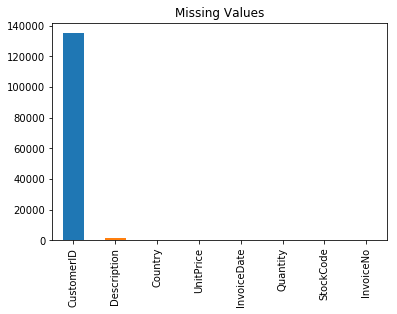

In [14]:
df.apply(lambda x: sum(pd.isnull(x))).sort_values(ascending = False).plot(kind = 'bar')
plt.title('Missing Values')
plt.show()

In [15]:
# remove null rows
df = df.dropna()

In [18]:
df.apply(lambda x: sum(pd.isnull(x))).sort_values(ascending = False)

Country        0
CustomerID     0
UnitPrice      0
InvoiceDate    0
Quantity       0
Description    0
StockCode      0
InvoiceNo      0
dtype: int64

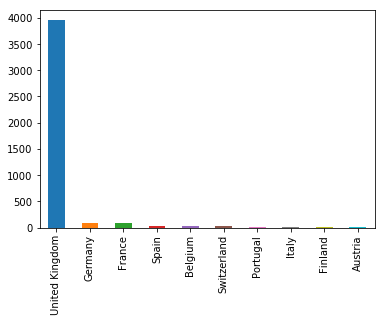

In [21]:
# remove duplicates
country = df[['Country','CustomerID']].drop_duplicates()
country.Country.value_counts()[:10].plot(kind = 'bar')
plt.show()

In [22]:
uk = df[df['Country'] == 'United Kingdom']
uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [24]:
uk.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [25]:
# Quantity is less than 0 which is not possible
uk = uk.query('Quantity > 0')
uk.describe()

,Quantity,UnitPrice,CustomerID
count,354345.000000,354345.000000,354345.000000
mean,12.048913,2.963793,15552.436219
std,190.428127,17.862067,1594.546025
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15522.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,8142.750000,18287.000000


In [26]:
# Choose relevant columns
uk = uk[['CustomerID', 'InvoiceDate', 'InvoiceNo', 'Quantity', 'UnitPrice']]
uk['Total Price'] = uk['Quantity'] * uk['UnitPrice']

In [29]:
print(uk['InvoiceDate'].min(), uk['InvoiceDate'].max())

2010-12-01 08:26:00 2011-12-09 12:49:00


In [30]:
present = dt.datetime(2011,12,10)
uk['InvoiceDate'] = pd.to_datetime(uk['InvoiceDate'])

In [31]:
uk.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,Total Price
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


* Recency: Calculate number of days between present date and last purchase
* Frequency: Calcualte number of orders
* Monetary: Calculate sum of purchase price for each customer

In [40]:
rfm = uk.groupby('CustomerID').agg({'InvoiceDate': lambda date: (present - date.max()).days,
                              'InvoiceNo': lambda num: len(num),
                             'Total Price': lambda price: sum(price)})

rfm.columns = ['Recency','Frequency','Monetary']
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [38]:
rfm.Recency = rfm.Recency.astype('int')

### Computing quantile with RFM values

In [46]:
rfm['r'] = pd.qcut(rfm['Recency'],4,['1','2','3','4'])
rfm['f'] = pd.qcut(rfm['Frequency'],4,['4','3','2','1'])
rfm['m'] = pd.qcut(rfm['Monetary'],4,['4','3','2','1'])

In [47]:
rfm.head()

,Recency,Frequency,Monetary,r,f,m
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


In [48]:
rfm['RFM_score'] = rfm.r.astype('str') + rfm.f.astype('str') + rfm.m.astype('str')
rfm.head()

,Recency,Frequency,Monetary,r,f,m,RFM_score
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4596,33719.73,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,122


In [49]:
# filter best customers
rfm[rfm['RFM_score'] == '111'].sort_values('Monetary', ascending = False).head()

,Recency,Frequency,Monetary,r,f,m,RFM_score
CustomerID,,,,,,,
18102.0,0,431,259657.30,1,1,1,111
17450.0,8,337,194550.79,1,1,1,111
17511.0,2,963,91062.38,1,1,1,111
16684.0,4,277,66653.56,1,1,1,111
14096.0,4,5111,65164.79,1,1,1,111
